
# <font color='blue'>ANÁLISE DESCRITIVA</font>
## <font color='blue'>Performance das Linhas de Separação de Pedidos ( Pickiking) </font>
## <font color='blue'> Centro de Distribuição de Cosméticos </font>



### Entendendo o Contexto.
<br> 
<div style="text-align: justify">
O Centro de Distribuição New Cosmetic iniciou suas operações no ano de 2023, sendo responsável pela distribuição de produtos para atender todos os estados do Nordeste brasileiro. É um centro de distribuição que opera com seis linhas de separação automatizadas com a tecnologia Picto Light. Cada uma dessas seis linhas é dedicada a uma categoria específica de produtos: condicionador, hidratante facial, máscara de hidratação, óleo capilar, protetor solar e shampoos.
</div>

<br> 

<div style="text-align: justify">
A expectativa no primeiro ano de operação, com base nas metas estabelecidas pela direção do CD, era atingir uma média ideal de 1.685 peças separadas por hora para cada categoria de produtos. No entanto, antes do encerramento de 2023, foi conduzido um levantamento da produtividade global das seis linhas de separação de janeiro a outubro desse ano. A média real alcançada foi de 1.595 peças separadas por hora para cada categoria. A meta mínima estabelecida pela direção do CD era de 1.500 peças por hora. A produtividade média das seis linhas foi de 1.594 peças por hora, superando a meta mínima em 95 peças, o que gerou alerta por parte da direção.
</div>



### O Problema Logístico.
<br> 
<div style="text-align: justify">
O desafio enfrentado pelo Centro de Distribuição é a discrepância entre a expectativa da direção do Centro de Distribuição de uma média de 1.685 peças separadas por hora, para cada categoria de produtos, e a média real de 1.594 peças por hora observada de janeiro a outubro de 2023. O problema a ser abordado é identificar as categorias ou linhas que podem estar contribuindo para essa baixa produtividade.
</div>

### Relevância do Problema Logístico.
<br> 
<div style="text-align: justify">
A baixa produtividade impacta diretamente na eficiência operacional do Centro de Distribuição, podendo comprometer a capacidade de atender à demanda do mercado. Isso ressalta a importância de compreender e corrigir as razões por trás da discrepância para garantir a satisfação dos clientes e o alcance das metas estabelecidas pela direção.
</div>


### Propósito e Expectativas da Análise Descritiva dos Dados.
<br> 
<div style="text-align: justify">
O propósito da análise descritiva é identificar padrões e variações na produtividade das seis linhas de separação, buscando compreender melhor as razões por trás da média real de 1.594 peças por hora. O objetivo é fornecer insights acionáveis para aprimorar a eficiência operacional.
</div><br> 
Por meio dessa análise, espera-se identificar categorias ou linhas específicas abaixo das metas estabelecidas e compreender os fatores que contribuem para a baixa produtividade. Esses insights críticos serão entregues à direção, embasando decisões estratégicas para otimizar a eficiência global do Centro de Distribuição.
</div>

### Instalando os Pacotes para as Análises dos Dados Logísticos.

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

### Carregando o DataFrame com os Dados Logísticos - Separação de Peças por Hora.

In [2]:
# Código para carregar o dataset de produtividade das linhas de separação do centro de Distrbuição.
dfprod = pd.read_csv("C:\Arquivos\PRODUTIVIDADE_CD23.csv",encoding = "ISO-8859-1")


### Compreendendo os Dados Logísticos - Separação de Peças por Hora.

In [3]:
# Código para mostrar a quantidade de linhas e colunas do dataframe.
dfprod.shape

# Temos 21.840 linhas e 07 colunas.

(21840, 7)

In [4]:
# Código para contar o número de valores nulos (NaN) em cada coluna do dataFrame.
dfprod.isna().sum()

# Não temos nenhum valor nulo.

data_sep         0
mes              0
hora_sep         0
turno_sep        0
linha_sep        0
categoria        0
produtividade    0
dtype: int64

In [5]:
# Código para verificar as primeiras 05 linhas do dataframe.
dfprod.head()


,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
0,02/01/2023,jan,06:00-07:00,primeiro_turno,linha_01,shampoos,1249
1,02/01/2023,jan,07:00-08:00,primeiro_turno,linha_01,shampoos,2849
2,02/01/2023,jan,08:00-09:00,primeiro_turno,linha_01,shampoos,823
3,02/01/2023,jan,09:00-10:00,primeiro_turno,linha_01,shampoos,2478
4,02/01/2023,jan,10:00-11:00,primeiro_turno,linha_01,shampoos,1030


In [6]:
# Código para verificar as 05 últimas linhas do dataframe.
dfprod.tail()


,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar,1625
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar,1033
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar,1826
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar,796
21839,31/10/2023,out,21:00-22:00,segundo_turno,linha_06,protetor_solar,957


In [7]:
# código para fornecer informações concisas sobre um dataFrame.
dfprod.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21840 entries, 0 to 21839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_sep       21840 non-null  object
 1   mes            21840 non-null  object
 2   hora_sep       21840 non-null  object
 3   turno_sep      21840 non-null  object
 4   linha_sep      21840 non-null  object
 5   categoria      21840 non-null  object
 6   produtividade  21840 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 1.2+ MB


In [8]:
# Código para gerar as estatísticas descritivas para as colunas numéricas int64 (inteiros) do dataFrame.
dfprod.describe()

# Temos count =  quantidade de linhas,
# mean =  Média da separação de peças/h.
# min = Indica o valor minimo que foi alcabçado na separação de peças/h.
# std =  Desvio padrão separação de peças/h
# Primeiro quartil =  25 %  da separação de peças/h estão abaixo desse valor.
# Segundo Quartil = Mediana = 50%  da separação de peças/h estão abaixo desse valor.
# Terceiro Quartil = 75% da separação de peças/h estã abaixo dessa valor.
# Valor máximo = Indica o valor máximo que foi alcabçado na separação de peças/h.


,produtividade
count,21840.000000
mean,1595.212225
std,608.726098
min,600.000000
25%,1110.750000
50%,1401.000000
75%,2051.000000
max,3000.000000


In [9]:
# Código retornar o número total de linhas duplicadas no dataFrame.
dfprod.duplicated().sum()

# Não temos no dataframe nenhuma linha duplicada

0

# <font color='blue'>Respondendo às Perguntas de Negócios- Fase 01</font>

### 01- Qual é a distribuição da separação de peças por hora do Centro de Distribuição New Cosmetic?
#### A- Cálculo do Histograma.

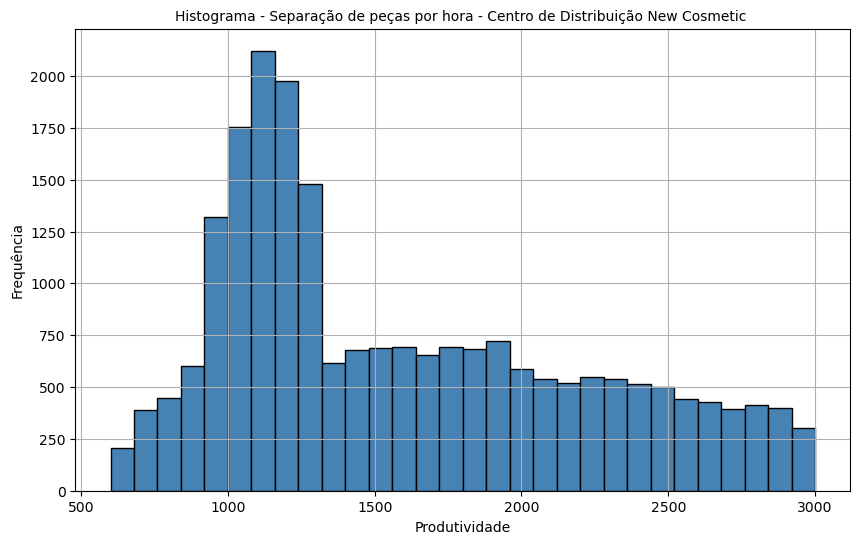

In [10]:
import matplotlib.pyplot as plt

# Configurar tamanhos padrão da fonte
plt.rc('font', size=10)          # Tamanho geral da fonte
plt.rc('axes', titlesize=10)      # Tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=10)      # Tamanho da fonte das etiquetas dos eixos
plt.rc('xtick', labelsize=10)     # Tamanho da fonte dos rótulos do eixo x
plt.rc('ytick', labelsize=10)     # Tamanho da fonte dos rótulos do eixo y
plt.rc('legend', fontsize=10)     # Tamanho da fonte da legenda
plt.rc('figure', titlesize=10)    # Tamanho da fonte do título da figura

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Cálculo do Histograma com cor
dfprod["produtividade"].hist(bins=30, edgecolor='black', color='steelblue')

# Adicionar título e rótulos aos eixos
plt.title('Histograma - Separação de peças por hora - Centro de Distribuição New Cosmetic ')
plt.xlabel('Produtividade')
plt.ylabel('Frequência')

# Exibir o gráfico
plt.show()


**Análise do resultado Histograma.**
    
A distribuição da separação de peças por hora no Centro de Distribuição New Cosmetic varia entre 600 peças por hora, como produção mínima, e 3.000 peças por hora, atingindo a produção máxima.Período analisado de janeiro a outubro de 2023.


#### B- Cálculo do Bloxplot.

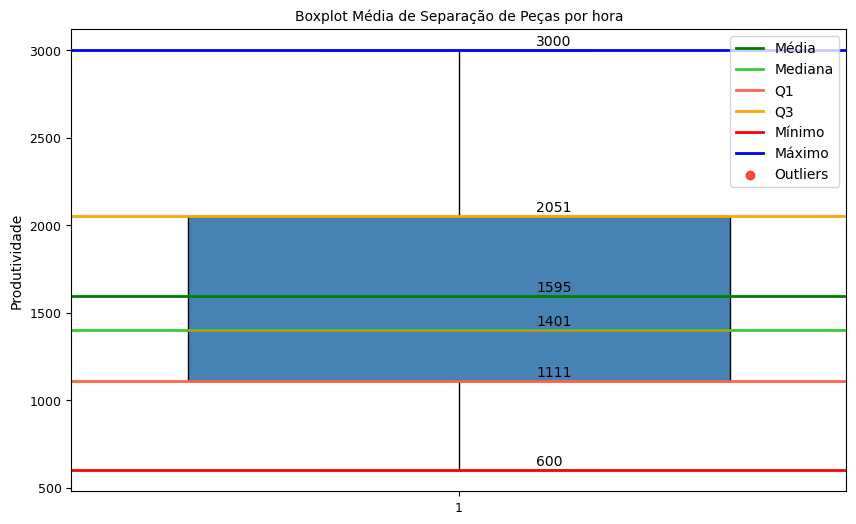

In [11]:
import matplotlib.pyplot as plt

# Configurar tamanhos padrão da fonte
plt.rc('font', size=10)          # Tamanho geral da fonte
plt.rc('axes', titlesize=10)      # Tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=10)      # Tamanho da fonte das etiquetas dos eixos
plt.rc('xtick', labelsize=9)     # Tamanho da fonte dos rótulos do eixo x
plt.rc('ytick', labelsize=9)     # Tamanho da fonte dos rótulos do eixo y
plt.rc('legend', fontsize=10)     # Tamanho da fonte da legenda
plt.rc('figure', titlesize=10)    # Tamanho da fonte do título da figura

# Calcular estatísticas descritivas
estatisticas = dfprod["produtividade"].describe()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar boxplot com cor nas caixas internas e aumentar a caixa
bp = plt.boxplot(dfprod["produtividade"], patch_artist=True, widths=0.7)

# Definir a cor desejada para as caixas internas
bp['boxes'][0].set_facecolor('steelblue')

# Adicionar linhas para indicar a média, mediana (50%), Q1, Q3, mínimo e máximo
plt.axhline(estatisticas['mean'], color='green', linewidth=2, label='Média')  # Média
plt.text(1.1, estatisticas['mean'] + 10, f'{estatisticas["mean"]:.0f}', color='black', verticalalignment='bottom')#ValordaMédia

plt.axhline(estatisticas['50%'], color='limegreen', linewidth=2, label='Mediana')  # Mediana
plt.text(1.1, estatisticas['50%'] + 10, f'{estatisticas["50%"]:.0f}', color='black', verticalalignment='bottom')#ValordaMediana

plt.axhline(estatisticas['25%'], color='tomato', linewidth=2, label='Q1')  # Q1
plt.text(1.1, estatisticas['25%'] + 10, f'{estatisticas["25%"]:.0f}', color='black', verticalalignment='bottom')#Valord Q1

plt.axhline(estatisticas['75%'], color='orange', linewidth=2, label='Q3')  # Q3
plt.text(1.1, estatisticas['75%'] + 10, f'{estatisticas["75%"]:.0f}', color='black', verticalalignment='bottom')#ValordeQ3

plt.axhline(estatisticas['min'], color='red', linewidth=2, label='Mínimo')  # Mínimo
plt.text(1.1, estatisticas['min'] + 10, f'{estatisticas["min"]:.0f}', color='black', verticalalignment='bottom')#ValordoMínimo

plt.axhline(estatisticas['max'], color='blue', linewidth=2, label='Máximo')  # Máximo
plt.text(1.1, estatisticas['max'] + 10, f'{estatisticas["max"]:.0f}', color='black', verticalalignment='bottom')#ValordoMáximo

# Adicionar outliers se houver
outliers = bp['fliers'][0].get_ydata()
plt.scatter([1] * len(outliers), outliers, marker='o', color='red', alpha=0.7, label='Outliers')

plt.title('Boxplot Média de Separação de Peças por hora')
plt.ylabel('Produtividade')
plt.legend()  # Adicionar legenda
plt.show()


**Análise do resultado do Boxplot.**

Interpretando as estatísticas (mínimo, 1º quartil, mediana, média, 3º quartil e máximo) no contexto do processo logístico do Centro de Distribuição New Cosmetic.

**Mínimo (600):** O valor mínimo de 600 peças por hora representa a produção mais baixa registrada em uma hora para uma categoria de produtos no período analisado.

**1º Quartil (Q1 - 1.111):** O primeiro quartil indica que 25% da produtibidade (separação de peças por hora) está abaixo de 1.111 peças. Isso revela que a maior parte da produção está acima desse valor.

**Mediana (Q2 - 1.401):** A mediana, ou segundo quartil, é o valor que divide a distribuição ao meio. Neste caso, indica que 50% da produtividade está está acima de 1.401 peças e a outra metade está abaixo.

Observação:

- A média ideal de separação de peças por hora estabelecida pela direção do centro de distribuição foi de 1.685 peças.
- A média mínima tolerada pela direção do centro de distribuição foi de 1.500 peças por hora.
- A mediana apresenta um valor de 1.401 peças por hora. Aproximadamente 50% da separação de peças por hora no CD New Cosmetic está abaixo da média mínima aceitável pela direção do CD, que foi de 1.500 peças por hora.

**Média (1.595):** A média aritmética representa a média das peças separadas por hora para todas as categorias de produtos. Neste caso, a média é de 1.595 peças por hora.

**3º Quartil (Q3 - 2.501):** O terceiro quartil mostra que 75% da produtividade, separação de peça por hora, está abaixo de 2.501 peças por hora. Isso sugere que uma parte significativa da produção está concentrada nesse intervalo.

**Máximo (3000):**  O valor máximo de 3000 peças por hora representa a produção mais alta registrada em uma hora para uma categoria de produtos no período analisado.

#### Cálculo do Coeficente de Variação - CV.

In [12]:
# O coeficiente de variação (CV):
# É uma medida estatística que expressa a variabilidade relativa de uma distribuição em relação à sua média.
# É calculado como o desvio padrão dividido pela média, multiplicado por 100 para expressar o resultado em termos percentuais.
    
dfprod["produtividade"].std()/dfprod["produtividade"].mean()

0.3815956828923348

**Análise do resultado do Coeficente de Variação:**
<br>

* **Um coeficiente de variação** de 38,16% indica que existe uma moderada a alta variação na quantidade de peças separadas por hora no centro de distribuição. Isso significa que o número de peças separadas pode variar significativamente de hora para hora.
<br>

* **Com uma média** de peças separadas por hora de 1.595 peças e um Coeficiente de Variação de 38,16%, isso indica que temos um número de peças separadas variando entre 38,16% abaixo da meta e 38,16% acima da meta, correspondendo a 986 peças a 2.204 peças por hora.
<br>

* **Essa alta variabilidade** pode ter várias consequências negativas, como dificuldade em prever a quantidade de peças separadas, ineficiência no processo e dificuldade em controlar a qualidade. A gestão do Centro de Distribuição New Cosmetic deve investigar as fontes de variação e implementar medidas para reduzi-la.
<br>

Interpretação do Coeficiente de Variação (CV):
* CV < 10%: Baixa variabilidade
* 10% < CV < 30%: Moderada variabilidade
* CV > 30%: Alta variabilidade


**Cálculo da assimetria, ou skew:**

<div style="text-align: justify">
Quantifica a assimetria ou a falta de simetria em uma distribuição de probabilidade.
A assimetria indica se a cauda da distribuição está inclinada para a esquerda, para a direita ou se está aproximadamente simétrica.
</div><br>

* **Skewness > 0:** Assimetria à direita (cauda longa à direita).
* **Skewness < 0:** Assimetria à esquerda (cauda longa à esquerda).
* **Skewness = 0:** Distribuição simétrica.

In [13]:
# código para aalcular a assimetria, ou "skew"

dfprod["produtividade"].skew() 

0.6186678014975286

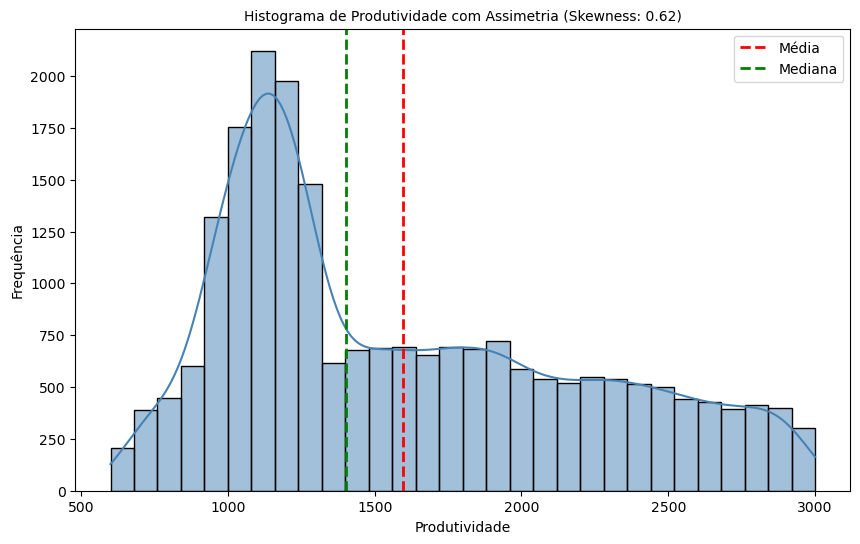

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar os tamanhos padrão da fonte
plt.rc('font', size=10)          # Tamanho geral da fonte
plt.rc('axes', titlesize=10)      # Tamanho da fonte do título dos eixos
plt.rc('axes', labelsize=10)      # Tamanho da fonte das etiquetas dos eixos
plt.rc('xtick', labelsize=10)     # Tamanho da fonte dos rótulos do eixo x
plt.rc('ytick', labelsize=10)     # Tamanho da fonte dos rótulos do eixo y
plt.rc('legend', fontsize=10)     # Tamanho da fonte da legenda
plt.rc('figure', titlesize=10)    # Tamanho da fonte do título da figura

# Calcular a assimetria (skewness) e a mediana
skewness = dfprod["produtividade"].skew()
mediana = dfprod["produtividade"].median()

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar um histograma
sns.histplot(dfprod["produtividade"], bins=30, kde=True, color='steelblue')

# Adicionar linhas verticais para a média e a mediana
plt.axvline(dfprod["produtividade"].mean(), color='red', linestyle='dashed', linewidth=2, label='Média')
plt.axvline(mediana, color='green', linestyle='dashed', linewidth=2, label='Mediana')

# Adicionar rótulos aos eixos e título
plt.xlabel('Produtividade')
plt.ylabel('Frequência')
plt.title(f'Histograma de Produtividade com Assimetria (Skewness: {skewness:.2f})')

# Adicionar legenda
plt.legend()

# Exibir o gráfico
plt.show()


**Análise do resultado da Skew (Assimetria):**

<br>

<div style="text-align: justify">
Um coeficiente de assimetria (skewness) de 0,6186678014975286 indica que a distribuição dos dados, separação de peças por hora é assimetria à direita. Conforme podemos olhar no gráfico Histograma de produtibidade assimetria.
</div><br>

<div style="text-align: justify">
Isso significa que a maioria dos valores estão concentrada no lado esquerdo da distribuição, com uma cauda longa no lado direito. Com uma mediana de 1.401 peças separadas por hora, indica que a metade dos valores é menor ou igual a 1.401 e a outra metade é maior ou igual a 1.401 peças separadas por hora.
</div><br>

**Resumo da análise de distribuição da separação de peças por hora do Centro de Distribuição New Cosmetic**

**Conclusões-Chave para Gestores:**

1-**Variabilidade e Eficiência:** O processo de separação de peças por hora no Centro de Distribuição New Cosmetic apresenta uma ampla variabilidade, com produções variando entre 600 e 3000 peças por hora. Isso destaca momentos de eficiência variável ao longo do período analisado.


2-**Concentração de Produção:** A concentração de produção se encontra em níveis intermediários, indicada pela mediana de 1.401 peças por hora. Isso significa que metade da produtividade está abaixo desse valor e a outra metade está acima.

3- **Desafios nas Metas:** A média de 1.595 peças por hora fica abaixo da meta ideal estabelecida pela direção (1.685), evidenciando desafios consistentes em atingir as metas propostas.

4- **Foco em Melhoria:** Cerca de 50% da produção está abaixo da média mínima aceitável (1.500 peças por hora). Isso aponta para áreas específicas de baixa produtividade que exigem atenção e melhorias para otimizar o desempenho geral.

5- **Oportunidades Estratégicas:** O 3º quartil (2.501) revela que há capacidade para atingir níveis mais elevados de produção, oferecendo oportunidades estratégicas para maximizar a eficiência em momentos específicos.

6- **Gestão da Variabilidade:** O coeficiente de variação de 38,16% indica uma moderada a alta variação na produção de peças por hora. Isso destaca a necessidade de uma gestão proativa para reduzir a variabilidade, melhorar a previsibilidade e eficiência operacional.

7- **Assimetria e Tendências:** A assimetria à direita (skewness de 0,618) sugere que a distribuição de dados tem uma cauda longa à direita. A gestão deve considerar essa tendência ao planejar e tomar decisões.

**Recomendações:**
   - Identificar fontes específicas de baixa produtividade.
   - Implementar estratégias para atingir e superar as metas estabelecidas.
   - Focar em áreas com oportunidades estratégicas para aumentar a eficiência.
   - Proativamente gerenciar a variabilidade para melhorar a previsibilidade e a qualidade operacional.

Essas conclusões são essenciais para orientar ações estratégicas, promover melhorias e otimizar o desempenho geral do Centro de Distribuição New Cosmetic.

### 02- Existe uma variação de separação de peças/h por turnos de trabalho?

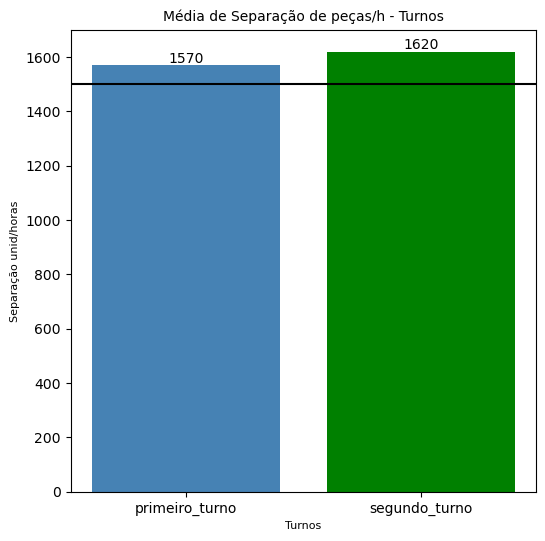

In [15]:
import matplotlib.pyplot as plt


# Calcular as médias por turno e renomear a coluna
df_media_turno = dfprod.groupby(["turno_sep"])["produtividade"].mean().reset_index()
dfturnos = df_media_turno.rename(columns={'produtividade': 'Media_produtividade_turno'})

# Criar uma lista de cores para cada turno_sep
cores = ['steelblue', 'green']  # Adicione mais cores conforme necessário

# Criar o gráfico de barras com tamanho ajustado
fig, ax = plt.subplots(figsize=(6, 6))

# Adicionar barras, com cor diferente para médias abaixo de 1500
bars = ax.bar(dfturnos["turno_sep"], dfturnos['Media_produtividade_turno'], color=cores)

# Adicionar uma linha horizontal para a média de 1500 peças
ax.axhline(y=1500, color='black', linestyle='-', label='Média de 1500 peças')

# Adicionar rótulos e título com tamanho de letra aumentado
ax.set_xlabel('Turnos', fontsize=8)
ax.set_ylabel('Separação unid/horas', fontsize=8)
ax.set_title('Média de Separação de peças/h - Turnos', fontsize=10)

# Ajustar tamanho da fonte das marcações no eixo x e y
ax.tick_params(axis='both', which='major', labelsize=10)

# Adicionar os valores no centro de cada barra com uma cor diferente
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, ), ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.show()


**Análise do Resultado do Gráfico, Média de Separação de Peças/hora - Turnos**

<br>
<div style="text-align: justify">
Ambos os turnos (primeiro e segundo) apresentam médias superiores à média mínima aceitável de 1.500 peças por hora, indicando que, em média, a produtividade atende aos padrões estabelecidos.
</div><br>
<div style="text-align: justify">
Entretanto, mesmo que a média do primeiro turno seja superior à média mínima aceitável de 1.500 peças por hora, a proximidade dessa média ao limite pode indicar uma margem menor de segurança. Isso pode ser um ponto de atenção, pois a proximidade à média mínima pode significar que o primeiro turno está mais suscetível a flutuações na produção que podem resultar em quedas abaixo do padrão aceitável.
<br>

### 03 - Como a separação de peças  varia por hora do dia? Existem horas específicas com maior ou menor separação?


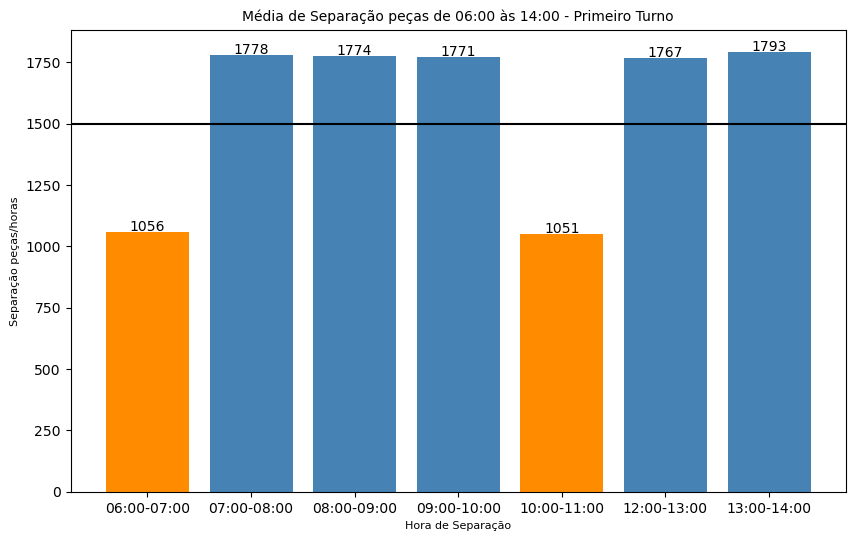

In [16]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para incluir apenas as horas de 06:00 às 14:00
dfhora_sep = dfprod[(dfprod['hora_sep'] >= '06:00') & (dfprod['hora_sep'] <= '14:00')]

# Código para agrupar e renomear colunas
dfhora_sep = dfhora_sep.groupby(["hora_sep"])["produtividade"].mean().reset_index()
dfhora_sep1 = dfhora_sep.rename(columns={'produtividade': 'Media_produtividade_hora'})

# Definir uma cor padrão para todas as barras
cor_padrao = 'steelblue'

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Adicionar barras, com cor diferente para médias abaixo de 1500
for index, row in dfhora_sep1.iterrows():
    cor = 'darkorange' if row['Media_produtividade_hora'] < 1500 else cor_padrao
    plt.bar(row['hora_sep'], row['Media_produtividade_hora'], color=cor)

    # Adicionar valores em cima das barras
    plt.text(row['hora_sep'], row['Media_produtividade_hora'] + 50, f'{row["Media_produtividade_hora"]:.0f}', ha='center', va='top', fontsize=10)

# Adicionar uma linha horizontal para a média de 1500 peças
plt.axhline(y=1500, color='black', linestyle='-', label='Média de 1500 peças')

# Adicionar rótulos e título com tamanho de letra aumentado
plt.xlabel('Hora de Separação', fontsize=8)
plt.ylabel('Separação peças/horas', fontsize=8)
plt.title('Média de Separação peças de 06:00 às 14:00 - Primeiro Turno', fontsize=10)

# Ajustar tamanho da fonte das marcações no eixo x
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Exibir o gráfico
plt.show()

**Análise do Resultado do Gráfico, Média de Separação de Peças 06:00 as 14:00 - Primeiro Turno**


**Variação nas Horas, Aumento de Produtividade:** Entre 06:00 e 07:00 horas, que corresponde ao inicio do turno a produtividade é baixa; Existe um aumento significativo das 07:00 as 08:00 horas, atingindo o pico de 1.778 peças, Isso pode indicar uma fase mais eficiente ou otimizada no processo durante essa hora.


**Consistência nas Horas, Estabilização da Produtividade:** Entre 07:00 e 10:00 horas, a produtividade permanece relativamente consistente, oscilando em torno de 1.770 peças por hora. Isso sugere uma estabilidade na produção durante essa parte do turno.


**Variação nas Horas, Queda de Produtividade:** Entre 10:00 e 11:00 horas, a produtividade cai para 1.051 peças, indicando uma queda acentuada nessa hora específica. Isso pode requerer uma análise mais aprofundada para entender as possíveis razões dessa diminuição.


**Média Geral:** A média de 1.570 peças por hora (considerando todas as horas fornecidas) está acima da média aceitável de 1.500 peças, o que é positivo. No entanto, a variação nas horas pode indicar áreas específicas que podem ser otimizadas para garantir uma produção mais consistente.


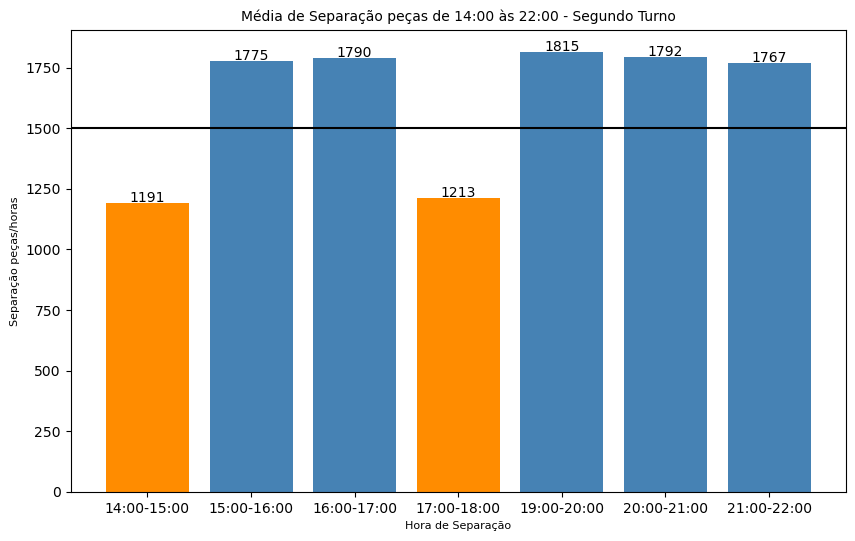

In [17]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame para incluir apenas as horas de 06:00 às 14:00
dfhora_sep = dfprod[(dfprod['hora_sep'] >= '14:00') & (dfprod['hora_sep'] <= '22:00')]

# Código para agrupar e renomear colunas
dfhora_sep = dfhora_sep.groupby(["hora_sep"])["produtividade"].mean().reset_index()
dfhora_sep1 = dfhora_sep.rename(columns={'produtividade': 'Media_produtividade_hora'})

# Definir uma cor padrão para todas as barras
cor_padrao = 'steelblue'

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))

# Adicionar barras, com cor diferente para médias abaixo de 1500
for index, row in dfhora_sep1.iterrows():
    cor = 'darkorange' if row['Media_produtividade_hora'] < 1500 else cor_padrao
    plt.bar(row['hora_sep'], row['Media_produtividade_hora'], color=cor)

    # Adicionar valores em cima das barras
    plt.text(row['hora_sep'], row['Media_produtividade_hora'] + 50, f'{row["Media_produtividade_hora"]:.0f}', ha='center', va='top', fontsize=10)

# Adicionar uma linha horizontal para a média de 1500 peças
plt.axhline(y=1500, color='black', linestyle='-', label='Média de 1500 peças')

# Adicionar rótulos e título com tamanho de letra aumentado
plt.xlabel('Hora de Separação', fontsize=8)
plt.ylabel('Separação peças/horas', fontsize=8)
plt.title('Média de Separação peças de 14:00 às 22:00 - Segundo Turno', fontsize=10)

# Ajustar tamanho da fonte das marcações no eixo x
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Exibir o gráfico
plt.show()

**Análise do Resultado do Gráfico, Média de Separação de Peças 14:00 as 22:00 - Segundo Turno**

**Variação nas Horas, Aumento de Produtividade:** Entre 14:00 e 15:00 horas, que corresponde ao início do turno, a produtividade é baixa. Existe um aumento significativo das 15:00 às 16:00 horas, atingindo o pico de 1.775 peças. Isso pode indicar uma fase mais eficiente ou otimizada no processo durante essa hora.

**Consistência nas Horas, Estabilização da Produtividade:** Entre 15:00 e 17:00 horas, a produtividade permanece relativamente consistente, oscilando em torno de 1.782 peças por hora. Isso sugere uma estabilidade na produção durante essa parte do turno.

**Variação nas Horas, Queda de Produtividade:** Entre 17:00 e 18:00 horas, a produtividade cai para 1.051 peças, indicando uma queda acentuada nessa hora específica. Isso pode requerer uma análise mais aprofundada para entender as possíveis razões dessa diminuição.

**Média Geral:** A média de 1.620 peças por hora (considerando todas as horas fornecidas) está acima da média aceitável de 1.500 peças, o que é positivo. No entanto, a variação nas horas pode indicar áreas específicas que podem ser otimizadas para garantir uma produção mais consistente.


### 04- Há evidências significativas na variação de peças separadas por hora ao longo dos meses?

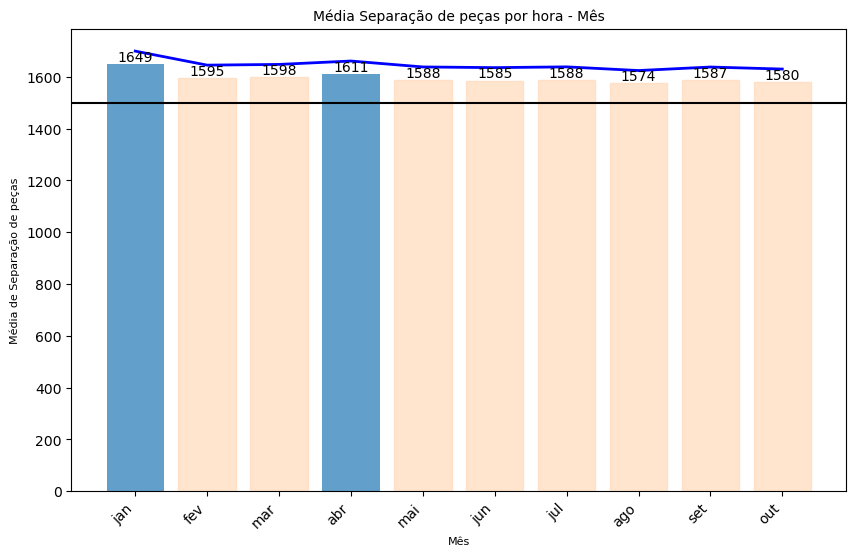

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

# Código para agrupar e renomear colunas
dfmes = dfprod.groupby(["mes"])["produtividade"].mean().reset_index()
dfmeses = dfmes.rename(columns={'produtividade': 'Media_produtividade_mes'})

# Converter os nomes dos meses para números
meses_numericos = {mes: i for i, mes in enumerate(['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out'])}
dfmeses["mes_numerico"] = dfmeses["mes"].map(meses_numericos)

# Ordenar o DataFrame pelos meses numéricos
dfmeses = dfmeses.sort_values(by="mes_numerico")

# Criar mais pontos para suavizar a linha
x_smooth = np.linspace(dfmeses["mes_numerico"].min(), dfmeses["mes_numerico"].max(), 300)
y_smooth = make_interp_spline(dfmeses["mes_numerico"], dfmeses["Media_produtividade_mes"])(x_smooth)

# Configurar o tamanho da figura
plt.figure(figsize=(10, 6))

# Criar um gráfico de barras com preenchimento de área
barras = plt.bar(dfmeses["mes"], dfmeses["Media_produtividade_mes"], alpha=0.7, label='Média Mensal')

# Marcar de amarelo as colunas com valores entre 1500 e 1599
for bar in barras:
    if 1500 <= bar.get_height() <= 1599:
        bar.set_color('peachpuff')

# Adicionar uma linha horizontal para a meta de 1500
plt.axhline(y=1500, color='Black', linestyle='-', label='Meta de 1500')

# Adicionar uma linha sobre as colunas
plt.plot(dfmeses["mes"], dfmeses["Media_produtividade_mes"] + 50, color='blue', linewidth=2, label='Linha sobre as colunas')

# Adicionar rótulos e título
plt.xlabel('Mês', fontsize=8)
plt.ylabel('Média de Separação de peças', fontsize=8)
plt.title('Média Separação de peças por hora - Mês', fontsize=10)

# Ajustar marcações no eixo x para mostrar nomes dos meses
plt.xticks(rotation=45, ha="right", fontsize=10)

# Adicionar os valores sobre as colunas
for bar in barras:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval,), ha='center', va='bottom', color='black', fontsize=10)

# Exibir o gráfico
plt.show()


**Análise do Resultado do Gráfico, Média de Separação de Peças horas - Mês**

**Média de Separação de Peças:** A média de separação de peças ao longo dos meses está acima da média mínima aceitável de 1.500 peças, indicando que atender ou supera essa meta.

**Proximidade ao Limite Mínimo:** A proximidade da média ao limite mínimo aceitável pode ser um ponto de atenção. Isso sugere que a operação está com uma margem menor de segurança em relação ao limite mínimo estabelecido. A consistência próxima ao limite pode tornar a operação mais suscetível a flutuações ou desafios operacionais.

**Variação Mensal Limitada:** Apesar da proximidade à média mínima, a variação mensal é relativamente limitada. Isso indica uma consistência nas operações ao longo dos meses, o que pode ser positivo para o planejamento e a previsibilidade.

**Variação Mensal:** Apesar da média estar acima do esperado, há uma variação nos números mensais. Janeiro tem a maior média, enquanto agosto tem a menor. Essa variação pode ser influenciada por diversos fatores, como sazonalidade, variações na demanda ou eficiência operacional. 


### 07- Quais Linhas de separação estão abaixo da meta minima aceitavel de 1.500 peças por hora ?

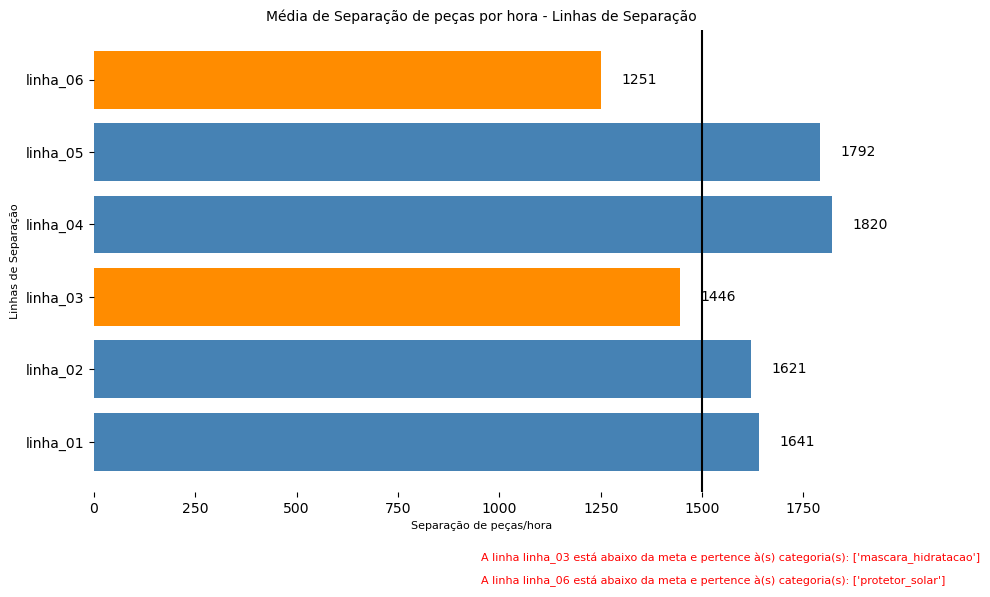

In [19]:
import matplotlib.pyplot as plt

# Calcular as médias por linha e renomear a coluna
dfmedia_linhas = dfprod.groupby(["linha_sep"])["produtividade"].mean().reset_index()
dfmedia_linhas02 = dfmedia_linhas.rename(columns={'produtividade': 'Media_produtividade'})

# Criar uma lista de cores personalizadas para cada linha_sep
cores_personalizadas = ['steelblue', 'steelblue', 'steelblue', 'steelblue', 'steelblue']

# Criar o gráfico de barras horizontais com tamanho ajustado
fig, ax = plt.subplots(figsize=(10, 6))

# Adicionar barras horizontais, com cor diferente para médias abaixo de 1500
bars = ax.barh(dfmedia_linhas02['linha_sep'], dfmedia_linhas02['Media_produtividade'], color=[
               'darkorange' if x < 1500 else cores_personalizadas[i] for i, x in enumerate(dfmedia_linhas02['Media_produtividade'])])

# Adicionar uma linha horizontal para a média de 1500 peças
ax.axvline(x=1500, color='black', linestyle='-', label='Média de 1500 peças')

# Adicionar rótulos e título com tamanho de letra aumentado
ax.set_ylabel('Linhas de Separação', fontsize=8)
ax.set_xlabel('Separação de peças/hora', fontsize=8)
ax.set_title('Média de Separação de peças por hora - Linhas de Separação', fontsize=10)

# Ajustar tamanho da fonte das marcações no eixo x e y
ax.tick_params(axis='both', which='major', labelsize=10)

# Remover as bordas do gráfico
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Adicionar os valores no lado direito de cada barra com uma cor diferente
for bar in bars:
    xval = bar.get_width()
    ax.text(xval + 50, bar.get_y() + bar.get_height()/2, round(xval, ), ha='left', va='center', color='black', fontsize=10)

# Adicionar informações sobre linhas abaixo da meta
info_linha_03 = "A linha linha_03 está abaixo da meta e pertence à(s) categoria(s): ['mascara_hidratacao']"
info_linha_06 = "A linha linha_06 está abaixo da meta e pertence à(s) categoria(s): ['protetor_solar']"

ax.text(0.5, -0.15, info_linha_03, transform=ax.transAxes, fontsize=8, color='red')
ax.text(0.5, -0.20, info_linha_06, transform=ax.transAxes, fontsize=8, color='red')

# Exibir o gráfico
plt.show()




**Análise do Resultado do Gráfico, Média de Separação de Peças por hora - Linhas de Separação**

* As duas linhas de separação que estão abaixo do limite minio aceitavel de peças por hora são a linha 03 e linha 06

# <font color='blue'>Respondendo às Perguntas de Negócios- Fase 02</font>

**Análise descritiva fase 02 - Linha de Separação 03 e 06-(abaixo da meta minima)**

<br> 
<div style="text-align: justify">
Após realizarmos a primeira fase da análise descritiva do dataframe de separação de peças por hora do centro de distribuição News Cosmetic, onde encontramos alguns insights e entre eles as duas linhas de separação que estão abaixo da meta mínima de separação de peças por hora, que são a linha de separação 03 e a linha de separação 06; será realizada a análise descritiva dessas duas linhas que estão com a produtividade baixa.
</div><br>

**Compreendendo os Dados Logísticos - Separação de Peças por Hora. Linha 03 e linha 06**

In [20]:
#Criação de um novo dataframe somente com os dados da linha 03 e linha 06  que estão abaixo da meta
linhas_selecionadas = ['linha_03', 'linha_06']
df_linhas_selecionadas = dfprod[dfprod['linha_sep'].isin(linhas_selecionadas)]



In [21]:
# Código para verificar as primeiras 05 linhas do dataframe.
df_linhas_selecionadas.head()

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
364,03/01/2023,jan,06:00-07:00,primeiro_turno,linha_03,mascara_hidratacao,944
365,03/01/2023,jan,07:00-08:00,primeiro_turno,linha_03,mascara_hidratacao,855
366,03/01/2023,jan,08:00-09:00,primeiro_turno,linha_03,mascara_hidratacao,1996
367,03/01/2023,jan,09:00-10:00,primeiro_turno,linha_03,mascara_hidratacao,1280
368,03/01/2023,jan,10:00-11:00,primeiro_turno,linha_03,mascara_hidratacao,972


In [22]:
# Código para verificar as ultimas 05 linhas do dataframe.
df_linhas_selecionadas.tail()

,data_sep,mes,hora_sep,turno_sep,linha_sep,categoria,produtividade
21835,31/10/2023,out,16:00-17:00,segundo_turno,linha_06,protetor_solar,1625
21836,31/10/2023,out,17:00-18:00,segundo_turno,linha_06,protetor_solar,1033
21837,31/10/2023,out,19:00-20:00,segundo_turno,linha_06,protetor_solar,1826
21838,31/10/2023,out,20:00-21:00,segundo_turno,linha_06,protetor_solar,796
21839,31/10/2023,out,21:00-22:00,segundo_turno,linha_06,protetor_solar,957


In [23]:
# código para fornecer informações concisas sobre um dataFrame.
df_linhas_selecionadas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7280 entries, 364 to 21839
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   data_sep       7280 non-null   object
 1   mes            7280 non-null   object
 2   hora_sep       7280 non-null   object
 3   turno_sep      7280 non-null   object
 4   linha_sep      7280 non-null   object
 5   categoria      7280 non-null   object
 6   produtividade  7280 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 455.0+ KB


In [24]:
# Código para gerar as estatísticas descritivas para as colunas numéricas int64 (inteiros) do dataFrame.
df_linhas_selecionadas.describe()

,produtividade
count,7280.000000
mean,1348.585440
std,446.071271
min,600.000000
25%,1029.000000
50%,1222.000000
75%,1666.000000
max,2499.000000


### 01- Qual é a distribuição da separação de peças por hora da Linha de Separação 03 e 06?
#### A- Cálculo do Histograma - Linha 03 Linha 06.

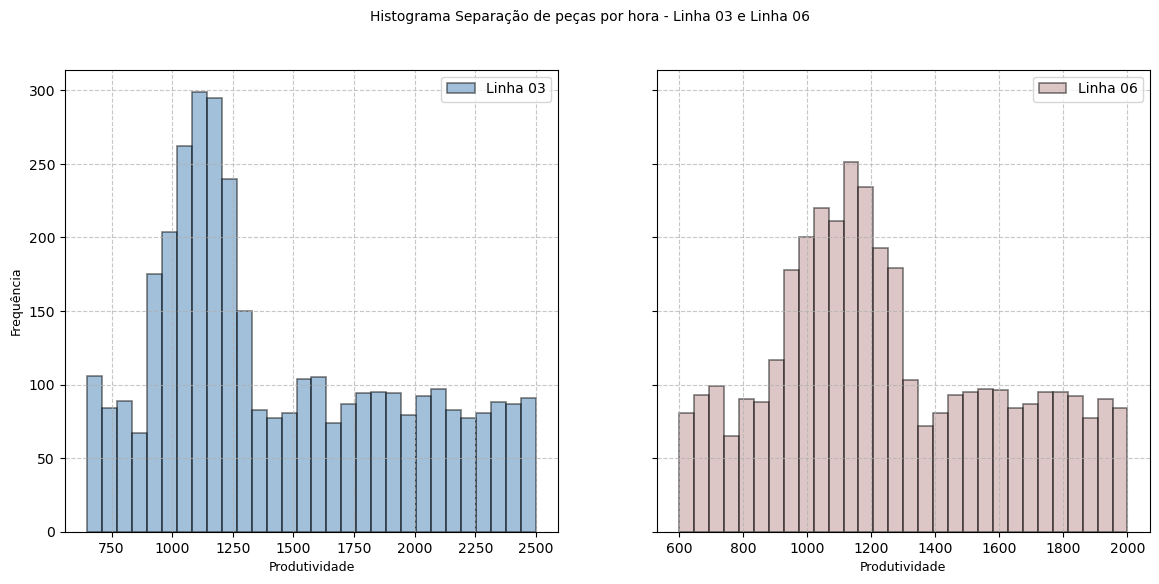

In [25]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecione os dados relevantes para as linhas 03 e 06
dados_linha_03 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_03']['produtividade']
dados_linha_06 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_06']['produtividade']

# Configurar o tamanho da figura
fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Criar os histogramas lado a lado com bordas pretas
axs[0].hist(dados_linha_03, bins=30, alpha=0.5, color='steelblue', edgecolor='black', linewidth=1.2, label='Linha 03')
axs[1].hist(dados_linha_06, bins=30, alpha=0.5, color='rosybrown', edgecolor='black', linewidth=1.2, label='Linha 06')

# Adicionar rótulos e título
fig.suptitle('Histograma Separação de peças por hora - Linha 03 e Linha 06', fontsize=10)
axs[0].set_xlabel('Produtividade', fontsize=9)
axs[1].set_xlabel('Produtividade', fontsize=9)
axs[0].set_ylabel('Frequência', fontsize=9)

# Configurar a fonte dos ticks
for ax in axs:
    ax.tick_params(axis='both', which='major', labelsize=10)
    ax.tick_params(axis='x', labelrotation=0)  # Ajuste para a rotação dos rótulos do eixo x

# Adicionar legenda
axs[0].legend()
axs[1].legend()

# Adicionar uma grade
for ax in axs:
    ax.grid(True, linestyle='--', alpha=0.7)

# Exibir o gráfico
plt.show()


**B- Cálculo do Bloxplot - Linha 02 3 Linha 06.**

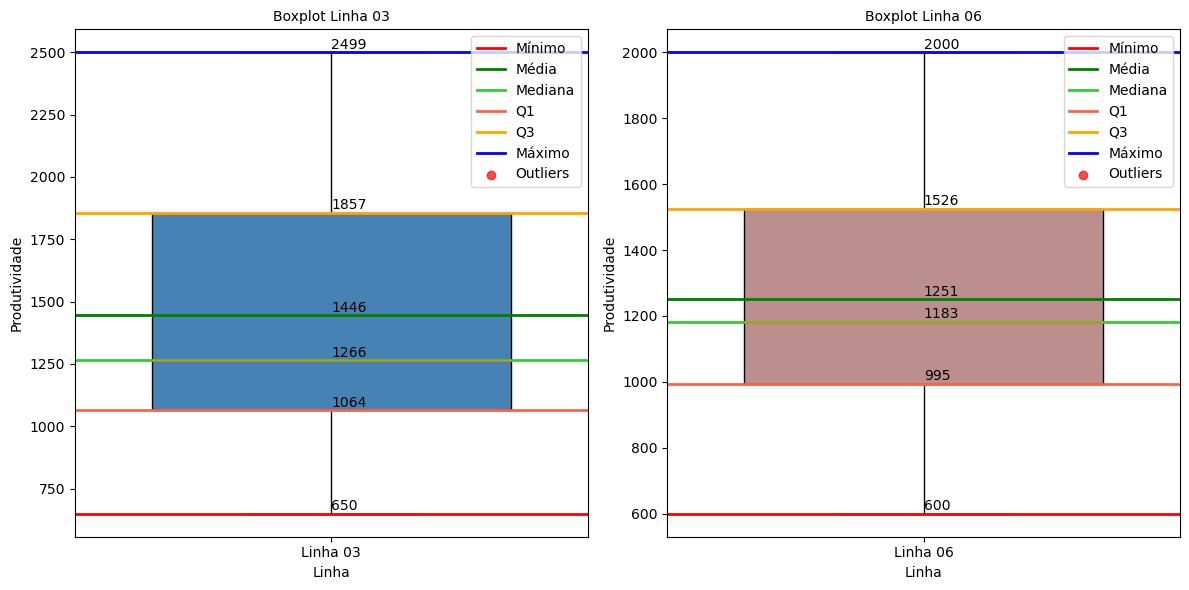

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

# Selecione os dados relevantes para as linhas 03 e 06
dados_linha_03 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_03']['produtividade']
dados_linha_06 = df_linhas_selecionadas[df_linhas_selecionadas['linha_sep'] == 'linha_06']['produtividade']

# Calcular estatísticas descritivas para as linhas
estatisticas_linha_03 = dados_linha_03.describe()
estatisticas_linha_06 = dados_linha_06.describe()

# Configurar o tamanho da figura
plt.figure(figsize=(12, 6))

# Criar o primeiro subplot para a Linha 03
plt.subplot(1, 2, 1)
bp_03 = plt.boxplot([dados_linha_03], labels=['Linha 03'], patch_artist=True, widths=0.7)

# Adicionar rótulos e título
plt.title('Boxplot Linha 03')
plt.xlabel('Linha')
plt.ylabel('Produtividade')

# Definir a cor desejada para as caixas internas
for patch, color in zip(bp_03['boxes'], ['steelblue']):
    patch.set_facecolor(color)

# Adicionar linhas para indicar a média, mediana (50%), Q1, Q3
plt.axhline(estatisticas_linha_03['min'], color='red', linestyle='solid', linewidth=2, label='Mínimo')
plt.axhline(estatisticas_linha_03['mean'], color='green', linestyle='solid', linewidth=2, label='Média')
plt.axhline(estatisticas_linha_03['50%'], color='limegreen', linestyle='solid', linewidth=2, label='Mediana')
plt.axhline(estatisticas_linha_03['25%'], color='tomato', linestyle='solid', linewidth=2, label='Q1')
plt.axhline(estatisticas_linha_03['75%'], color='orange', linestyle='solid', linewidth=2, label='Q3')
plt.axhline(estatisticas_linha_03['max'], color='blue', linestyle='solid', linewidth=2, label='Máximo')

# Adicionar valores acima das linhas
for stat in ['min', 'mean', '50%', '25%', '75%', 'max']:
    plt.text(1, estatisticas_linha_03[stat] + 1, f'{estatisticas_linha_03[stat]:.0f}', color='black', ha='left', va='bottom')

# Adicionar outliers se houver
outliers_03 = bp_03['fliers'][0].get_ydata()
plt.scatter([1] * len(outliers_03), outliers_03, marker='o', color='red', alpha=0.7, label='Outliers')

# Adicionar legenda
plt.legend()

# Criar o segundo subplot para a Linha 06
plt.subplot(1, 2, 2)
bp_06 = plt.boxplot([dados_linha_06], labels=['Linha 06'], patch_artist=True, widths=0.7)

# Adicionar rótulos e título
plt.title('Boxplot Linha 06')
plt.xlabel('Linha')
plt.ylabel('Produtividade')

# Definir a cor desejada para as caixas internas
for patch, color in zip(bp_06['boxes'], ['rosybrown']):
    patch.set_facecolor(color)

# Adicionar linhas para indicar a média, mediana (50%), Q1, Q3
plt.axhline(estatisticas_linha_06['min'], color='red', linestyle='solid', linewidth=2, label='Mínimo')
plt.axhline(estatisticas_linha_06['mean'], color='green', linestyle='solid', linewidth=2, label='Média')
plt.axhline(estatisticas_linha_06['50%'], color='limegreen', linestyle='solid', linewidth=2, label='Mediana')
plt.axhline(estatisticas_linha_06['25%'], color='tomato', linestyle='solid', linewidth=2, label='Q1')
plt.axhline(estatisticas_linha_06['75%'], color='orange', linestyle='solid', linewidth=2, label='Q3')
plt.axhline(estatisticas_linha_06['max'], color='blue', linestyle='solid', linewidth=2, label='Máximo')

# Adicionar valores acima das linhas
for stat in ['min', 'mean', '50%', '25%', '75%', 'max']:
    plt.text(1, estatisticas_linha_06[stat] + 1, f'{estatisticas_linha_06[stat]:.0f}', color='black', ha='left', va='bottom')

# Adicionar outliers se houver
outliers_06 = bp_06['fliers'][0].get_ydata()
plt.scatter([1] * len(outliers_06), outliers_06, marker='o', color='red', alpha=0.7, label='Outliers')

# Adicionar legenda
plt.legend()

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()